In [34]:
%matplotlib inline

import os
os.chdir("/Volumes/WorkDrive/gimmeSAD")
import implicit_BI
import gimmeSAD
import numpy as np
import matplotlib.pyplot as plt

# Begin simulation code

In [2]:
## Create the spatial model
data = implicit_BI.implicit_BI()

## Select the composition of the metacommunity
data.set_metacommunity("metacommunity_LS4.txt")
#data.set_metacommunity("uniform")

## Select the geologic process
#data.prepopulate(mode="landbridge")
data.prepopulate(mode="volcanic")


In [3]:
## Run the simulation for a while
for i in range(500000):
    if not i % 10000:
        print("Done {}".format(i))
        #print(i, len(data.local_community), len(set(data.local_community)))
    data.step()

Done 0
Done 10000
Done 20000
Done 30000
Done 40000
Done 50000
Done 60000
Done 70000
Done 80000
Done 90000
Done 100000
Done 110000
Done 120000
Done 130000
Done 140000
Done 150000
Done 160000
Done 170000
Done 180000
Done 190000
Done 200000
Done 210000
Done 220000
Done 230000
Done 240000
Done 250000
Done 260000
Done 270000
Done 280000
Done 290000
Done 300000
Done 310000
Done 320000
Done 330000
Done 340000
Done 350000
Done 360000
Done 370000
Done 380000
Done 390000
Done 400000
Done 410000
Done 420000
Done 430000
Done 440000
Done 450000
Done 460000
Done 470000
Done 480000
Done 490000


In [47]:
## When you decide you've run the simulations long enough, then simulate sequences for
## each species
data.simulate_seqs()

## Get the current abundace distribution and plot it
abundance_distribution = data.get_abundances(octaves=False)
print(gimmeSAD.plot_abundances_ascii(abundance_distribution))



Simulated Species Abundance Distribution
###############################################################################
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  12  1   
|||||||||||                                                             2  2   
|||||                                                                   1  4   
|||||                                                                   1  133 
|||||                                                                   1  7   
|||||                                                                   1  8   
|||||                                                                   1  10  
|||||                                                                   1  11  
|||||                                                                   1  12  
|||||                                                                   1  15  
|||||                                                                   1  18

In [53]:
print(gimmeSAD.tabulate_sumstats(data))

Species Name                      Col time    Loc Abund    Meta Abund      pi    pi_net     Dxy     S    S_island    pi_island    S_meta    pi_meta
------------------------------  ----------  -----------  ------------  ------  --------  ------  ----  ----------  -----------  --------  ---------
Hypothenemus arenaria               122773            5      20606973  0.0118    0.0056  0.0144    38          10       0.0052        29     0.0124
Mezium ater                          26072            6       6254702  0.0034    0.0013  0.0040    10           1       0.0004         9     0.0049
Trialeurodes regina                   8603            3      15835525  0.0004    0.0000  0.0004     2           0       0.0000         2     0.0008
Cryptophagus odorata                 77841            3       4477170  0.0028    0.0004  0.0030    10           3       0.0018         7     0.0035
Nesogonia postica                     4802            2       5658186  0.0000    0.0000  0.0000     0           

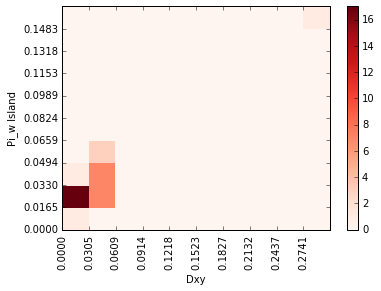

In [46]:
gimmeSAD.heatmap_pi_dxy(data)

In [69]:
## Bunch of code for generating the matrix to plug into the heatmap
sp = data.get_species()
heat = np.zeros((10,10), dtype=np.int)

for s in sp:
    s.simulate_seqs()
    s.get_sumstats()
pis = np.array([(x.pi, x.pi_island) for x in sp])
max_pi = max([x[0] for x in pis])
max_pi_island = max([x[1] for x in pis])
print max_pi, max_pi_island
## Make the bins
pi_bins = np.linspace(0, np.log(max_pi), 10)
pi_island_bins = np.linspace(0, np.log(max_pi_island), 10)

## Now you have the bins each value belongs in, but you need to 
## go through and populate the heat matrix
for pi, pi_island in pis:
    count_pi = 0
    count_pi_island = 0
    while not np.log(pi) <= pi_bins[count_pi]:
        count_pi += 1
    while not np.log(pi_island) <= pi_island_bins[count_pi_island]:
        count_pi_island += 1
    ## increment the heatmap point this corresponds to
    heat[count_pi][count_pi_island] += 1

    print(heat)

254.410526316 144.266666667
[[9 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]
 [2 0 2 0 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0]
 [0 1 0 2 0 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


In [111]:
import matplotlib.pyplot as plt

## Code for debugging the heatmap function
def myheatmap_pi_dxy(data):
    sp = data.get_species()

    heat = np.zeros((10,10), dtype=np.int)

    pis = np.array([(x.dxy, x.pi_island) for x in sp])
    max_pi = max([x[0] for x in pis])
    max_pi_island = max([x[1] for x in pis])
    print(max_pi, max_pi_island)

    ## Make the bins
    pi_bins = np.linspace(0, max_pi, 10)
    pi_island_bins = np.linspace(0, max_pi_island, 10)

    ## Now you have the bins each value belongs in, but you need to 
    ## go through and populate the heat matrix
    for pi, pi_island in pis:
        count_pi = 0
        count_pi_island = 0
        while not pi <= pi_bins[count_pi]:
            count_pi += 1
        while not pi_island <= pi_island_bins[count_pi_island]:
            count_pi_island += 1
        ## increment the heatmap point this corresponds to
        heat[count_pi][count_pi_island] += 1
        

    fig = plt.figure(figsize=(12,5))
    plt.subplot(121)
    
    plt.pcolor(heat,cmap=plt.cm.Reds)
#    plt.axis([0, max_pi, 0, max_pi_island])
    plt.xlabel('Dxy')
    plt.ylabel('Pi_w Island')
    plt.colorbar()
    plt.xticks(np.arange(len(pi_bins)), ["{0:.4f}".format(x) for x in pi_bins], rotation='vertical')
    plt.yticks(np.arange(len(pi_bins)), ["{0:.4f}".format(x) for x in pi_island_bins])
    

    plt.subplot(122)
    species = time
    species = qsort(species)
    species = species[::-1]
    x = np.arange(0,len(species))
    y = [xx.abundance for xx in species]
    y[0] = 176400
    plt.scatter(x, y, color="red")
    plt.xlim(0, len(species))
    plt.ylim(0, y[0])
    plt.ylabel("Abundance")
    plt.xlabel("Rank")
    
    plt.tight_layout()

    plt.show()
    plt.savefig("wat.png")
    plt.close()


(0.28549999999999948, 0.19213888888888853)


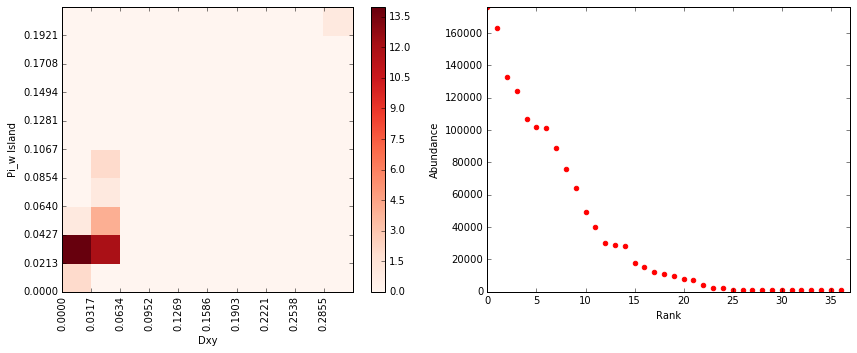

In [112]:

myheatmap_pi_dxy(data)

# Work on getting the heatmap axes normalized

In [4]:
sp_through_time = {}

In [20]:
## Get a chunk of data
for i in range(10):
    data.step(i*10000)
    data.simulate_seqs()
    sp_through_time[i] = data.get_species()

In [54]:
normalized_pi_dxy_heatmaps("/tmp", sp_through_time)

[1039, 689, 403, 722, 11, 662, 1380, 1554, 1162, 1480, 1301, 565, 832, 853, 1554, 66, 435, 1634, 1384, 1180, 499, 1234, 1416, 19, 1494, 1499, 1242, 1449, 584, 456, 1122, 535, 1503, 566]
(1.0202500000000034, 0.1094166666666668)
(0.99750000000000327, 0.12838888888888919)
(1.0356250000000042, 0.12505555555555578)
(1.1433750000000031, 0.15602777777777799)
(1.2398750000000036, 0.081722222222222293)
(1.2398750000000036, 0.15602777777777799)
('Doing', 'Time_11')
('Doing', 'Time_12')
('Doing', 'Time_13')
('Doing', 'Time_14')
('Doing', 'Time_15')


In [21]:
sp_through_time

{0: [<species Hypothenemus stantoni>,
  <species Neophyllaphis californica>,
  <species Paradiplosis punctella>,
  <species Phenacoccus californica>,
  <species fly andraemon>,
  <species Erynephala sordidus>,
  <species Synanthedon blackburni>,
  <species Adelphocoris sticticalis>,
  <species Saissetia sulcatus>,
  <species Haemaphysalis lectularius>,
  <species Amphicerus exsectoides>,
  <species Clastoptera punctella>,
  <species Blattella albopictus>,
  <species Amphicerus varians>,
  <species Dioryctria betulae>,
  <species Ascalapha perseae>,
  <species Dioryctria ocellus>,
  <species Podosesia imbricator>,
  <species Dolichovespula otiosana>,
  <species Cacopsylla rotundata>,
  <species Dioryctria lasiolepis>,
  <species Agrotis ephemeraeformis>,
  <species Saissetia incertus>,
  <species Haemaphysalis configurata>,
  <species Cadra kondoi>,
  <species Saissetia cereralis>,
  <species Papilio humile>,
  <species Caliothrips gowdeyi>,
  <species Phyllobius achemon>,
  <species Me

In [22]:
extant = sp_through_time.values()[-1]
pruned = gimmeSAD.prune_extant(sp_through_time)

unpruned {0: [<species Hypothenemus stantoni>, <species Neophyllaphis californica>, <species Paradiplosis punctella>, <species Phenacoccus californica>, <species fly andraemon>, <species Erynephala sordidus>, <species Synanthedon blackburni>, <species Adelphocoris sticticalis>, <species Saissetia sulcatus>, <species Haemaphysalis lectularius>, <species Amphicerus exsectoides>, <species Clastoptera punctella>, <species Blattella albopictus>, <species Amphicerus varians>, <species Dioryctria betulae>, <species Ascalapha perseae>, <species Dioryctria ocellus>, <species Podosesia imbricator>, <species Dolichovespula otiosana>, <species Cacopsylla rotundata>, <species Dioryctria lasiolepis>, <species Agrotis ephemeraeformis>, <species Saissetia incertus>, <species Haemaphysalis configurata>, <species Cadra kondoi>, <species Saissetia cereralis>, <species Papilio humile>, <species Caliothrips gowdeyi>, <species Phyllobius achemon>, <species Megachile trifolii>, <species Circulifer castanea>,

In [23]:
for i, time in pruned.items():
    print(i)
    for sp in time:
        if sp.uuid[0] in [x.uuid[0] for x in extant]:
            print("got one in extant {}".format(sp.uuid[0]))
        else:
            print("Got fucker not in extant {}".format([uuid[0]]))

0
got one in extant 1382
got one in extant 342
got one in extant 635
got one in extant 722
got one in extant 1380
got one in extant 1554
got one in extant 51
got one in extant 735
got one in extant 228
got one in extant 832
got one in extant 1478
got one in extant 1554
got one in extant 685
got one in extant 1173
got one in extant 584
got one in extant 381
got one in extant 130
got one in extant 269
got one in extant 1416
got one in extant 24
got one in extant 614
1
got one in extant 1382
got one in extant 342
got one in extant 635
got one in extant 722
got one in extant 1380
got one in extant 1554
got one in extant 51
got one in extant 735
got one in extant 228
got one in extant 832
got one in extant 1478
got one in extant 1554
got one in extant 685
got one in extant 1173
got one in extant 584
got one in extant 381
got one in extant 130
got one in extant 269
got one in extant 1416
got one in extant 24
got one in extant 614
got one in extant 566
2
got one in extant 342
got one in extan

In [29]:
## quicksort stolen from the internet
def qsort(arr): 
     if len(arr) <= 1:
          return arr
     else:
          return qsort([x for x in arr[1:] if x.abundance<arr[0].abundance])\
                    + [arr[0]] + qsort([x for x in arr[1:] if x.abundance>=arr[0].abundance])

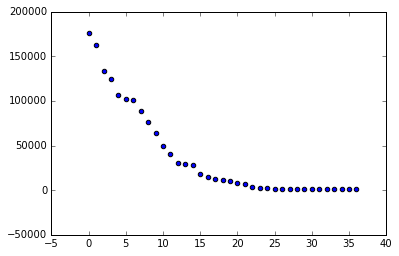

In [45]:

species = time
## Rank species by abundance
species = qsort(species)
species = species[::-1]
x = np.arange(0,len(species))
y = [xx.abundance for xx in species]
y[0] = 176400
plt.scatter(x, y)
plt.show()


<function matplotlib.pyplot.show>

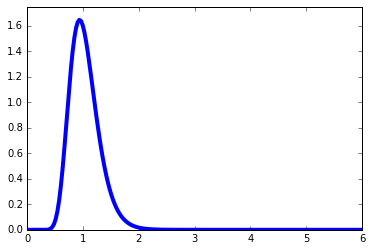

In [137]:
from scipy.stats import lognorm
import numpy as np
import pylab as pl

## Figs use (lognorm = [0.25, 0.5, 1,0.3])

stddev = 0.25
mean = 1.18749176686875
dist=lognorm(0.25, 0)
x=np.linspace(0,6,200)
pl.plot(x,dist.pdf(x), color="blue", linewidth=4)
pl.ylim(0, 1.75)
pl.show
#pl.plot(x,dist.cdf(x))



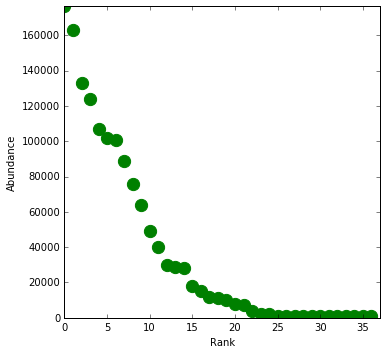

In [145]:
fig = plt.figure(figsize=(10,5))
if True:
    plt.subplot(122)
    species = time
    species = qsort(species)
    species = species[::-1]
    x = np.arange(0,len(species))
    y = [xx.abundance for xx in species]
    y[0] = 176400
    plt.scatter(x, y, color="green", s=150)
    plt.xlim(0, len(species))
    plt.ylim(0, y[0])
    plt.ylabel("Abundance")
    plt.xlabel("Rank")
    
    plt.tight_layout()

    plt.show()

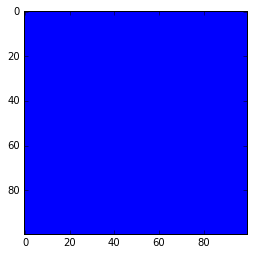

In [130]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import numpy as np

# make values from -5 to 5, for this example
zvals = np.zeros((100,100))
zvals -= 5
#zvals = np.random.rand(100,100)*10-5

# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['blue','black','red'])
bounds=[-6,-2,2,6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = pyplot.imshow(zvals,interpolation='nearest',
                    cmap = cmap,norm=norm)